In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from matplotlib.lines import Line2D

In [2]:
# Load taper_annotations.csv from the data directory
taper_df = pd.read_csv("../../Data/taper_annotations.csv")
# Drop rows with any missing values
taper_df = taper_df.dropna()
taper_df

,hup_id,taper_start_hr,reinit_start_hr
0,140,80.0,185.0
1,142,75.0,285.0
3,145,100.0,275.0
5,152,120.0,380.0
7,163,75.0,290.0
10,166,75.0,170.0
11,171,100.0,210.0
13,177,120.0,200.0
15,190,100.0,300.0


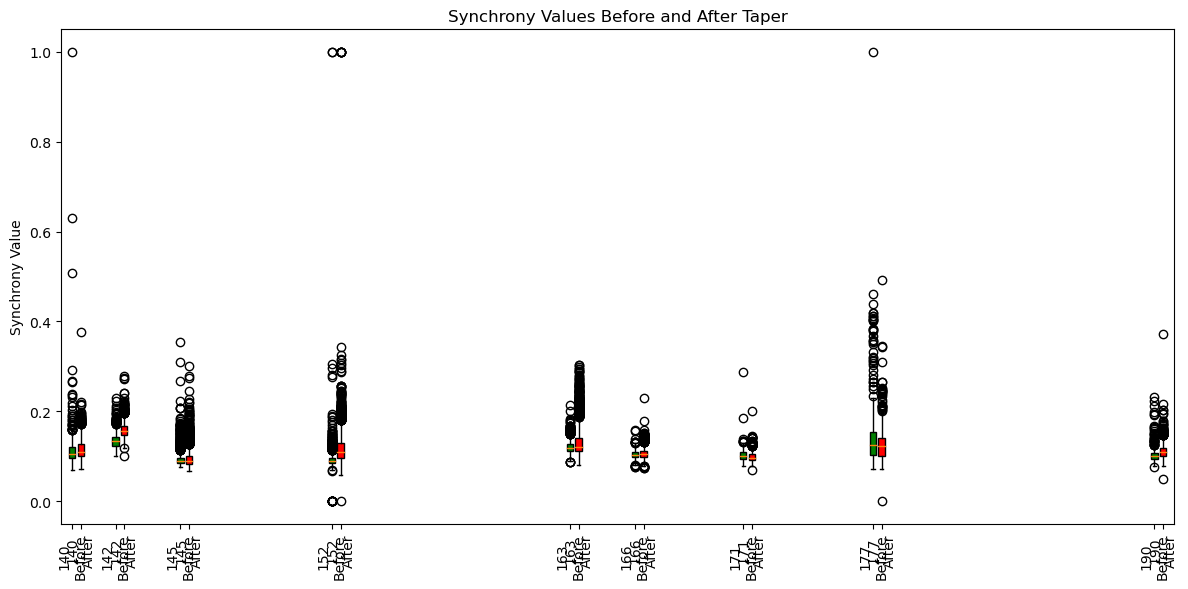

In [3]:
# Assuming taper_df and hourly_patient_features_df are already defined and loaded with data.

# Initialize dictionaries to store synchrony values for each hup_id
before_synchronies_dict = {}
after_synchronies_dict = {}

# Iterate through each row in the dataframe to collect synchrony values
for index, row in taper_df.iterrows():
    # Your existing code for data extraction
    hup_id = int(row["hup_id"])
    taper_start_hr = int(row["taper_start_hr"])
    taper_start_time = taper_start_hr * 60

    hourly_patient_features_df = pd.read_csv(
        f"../../Data/all_giant_tables/HUP_{hup_id}.csv"
    )

    first_seizure_time = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] > taper_start_time)
        & (hourly_patient_features_df["had_seizure"] >= 1)
    ]["emu_minute"].min()

    after_period = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] >= taper_start_time)
        & (hourly_patient_features_df["emu_minute"] < first_seizure_time)
    ]
    after_synchronies = after_period["synchrony_broadband"].values

    before_period = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] < taper_start_time)
        & (~hourly_patient_features_df["synchrony_broadband"].isna())
    ].tail(len(after_synchronies))
    before_synchronies = before_period["synchrony_broadband"].values

    before_synchronies = before_synchronies[~np.isnan(before_synchronies)]
    after_synchronies = after_synchronies[~np.isnan(after_synchronies)]

    # Store the 'before' and 'after' synchrony values in the corresponding dictionaries
    if hup_id not in before_synchronies_dict:
        before_synchronies_dict[hup_id] = []
        after_synchronies_dict[hup_id] = []

    before_synchronies_dict[hup_id].extend(before_synchronies)
    after_synchronies_dict[hup_id].extend(after_synchronies)

# Now, use matplotlib to create the boxplots in a wider figure
fig, ax = plt.subplots(figsize=(12, 6))  # Making the figure wider

# You would have to iterate over your dictionaries to plot the 'before' and 'after' boxplots for each hup_id
positions = []
labels = []
for hup_id in before_synchronies_dict:
    # Define positions for 'before' and 'after' boxplots for each hup_id
    before_position = hup_id - 0.2
    after_position = hup_id + 0.2
    positions.extend([before_position, after_position])
    labels.extend([f"{hup_id}\nBefore", f"{hup_id}\nAfter"])

    # Plot the 'before' boxplot in green
    bp_before = ax.boxplot(
        before_synchronies_dict[hup_id],
        positions=[before_position],
        patch_artist=True,
        widths=0.3,
    )
    plt.setp(bp_before["boxes"], facecolor="green")

    # Plot the 'after' boxplot in red
    bp_after = ax.boxplot(
        after_synchronies_dict[hup_id],
        positions=[after_position],
        patch_artist=True,
        widths=0.3,
    )
    plt.setp(bp_after["boxes"], facecolor="red")

# Set the labels and title
ax.set_ylabel("Synchrony Value")
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=90)
plt.title("Synchrony Values Before and After Taper")

# Show the plot
plt.tight_layout()
plt.show()

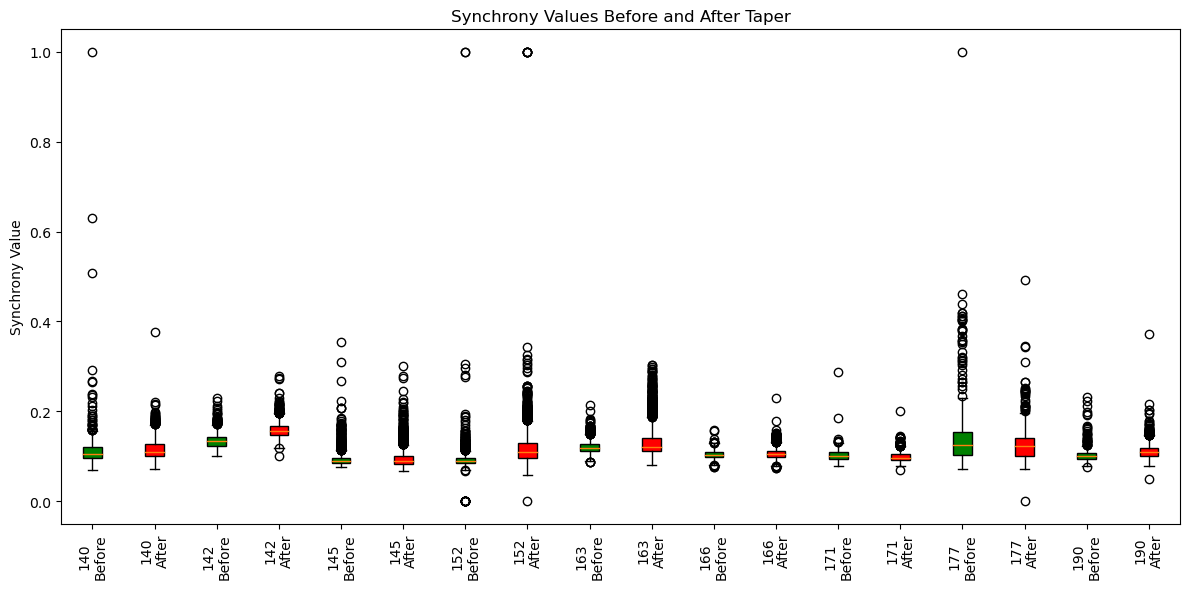

In [4]:
# Assuming taper_df and hourly_patient_features_df are already defined and loaded with data.

# Initialize dictionaries to store synchrony values for each hup_id
before_synchronies_dict = {}
after_synchronies_dict = {}

# Sort the hup_ids in ascending order and create a mapping to new indices
unique_hup_ids = sorted(taper_df["hup_id"].unique())
hup_id_to_index = {hup_id: index for index, hup_id in enumerate(unique_hup_ids)}

# Iterate through each row in the dataframe to collect synchrony values
for index, row in taper_df.iterrows():
    hup_id = int(row["hup_id"])
    taper_start_hr = int(row["taper_start_hr"])
    taper_start_time = taper_start_hr * 60

    hourly_patient_features_df = pd.read_csv(
        f"../../Data/all_giant_tables/HUP_{hup_id}.csv"
    )

    first_seizure_time = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] > taper_start_time)
        & (hourly_patient_features_df["had_seizure"] >= 1)
    ]["emu_minute"].min()

    after_period = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] >= taper_start_time)
        & (hourly_patient_features_df["emu_minute"] < first_seizure_time)
    ]
    after_synchronies = after_period["synchrony_broadband"].values

    before_period = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] < taper_start_time)
        & (~hourly_patient_features_df["synchrony_broadband"].isna())
    ].tail(len(after_synchronies))
    before_synchronies = before_period["synchrony_broadband"].values

    before_synchronies = before_synchronies[~np.isnan(before_synchronies)]
    after_synchronies = after_synchronies[~np.isnan(after_synchronies)]

    # Store the 'before' and 'after' synchrony values in the corresponding dictionaries
    hup_index = hup_id_to_index[hup_id]  # Use the new index for even spacing
    if hup_index not in before_synchronies_dict:
        before_synchronies_dict[hup_index] = []
        after_synchronies_dict[hup_index] = []

    before_synchronies_dict[hup_index].extend(before_synchronies)
    after_synchronies_dict[hup_index].extend(after_synchronies)

# Now, use matplotlib to create the boxplots in a wider figure
fig, ax = plt.subplots(figsize=(12, 6))  # Making the figure wider

# You would have to iterate over your dictionaries to plot the 'before' and 'after' boxplots using the new indices
positions = []
labels = []
for hup_index in sorted(before_synchronies_dict):
    hup_id = unique_hup_ids[hup_index]  # Get the actual hup_id for labeling
    # Define positions for 'before' and 'after' boxplots for each hup_index
    before_position = 2 * hup_index
    after_position = 2 * hup_index + 1
    positions.extend([before_position, after_position])
    labels.extend([f"{hup_id}\nBefore", f"{hup_id}\nAfter"])

    # Plot the 'before' boxplot in green
    bp_before = ax.boxplot(
        before_synchronies_dict[hup_index],
        positions=[before_position],
        patch_artist=True,
        widths=0.3,
    )
    plt.setp(bp_before["boxes"], facecolor="green")

    # Plot the 'after' boxplot in red
    bp_after = ax.boxplot(
        after_synchronies_dict[hup_index],
        positions=[after_position],
        patch_artist=True,
        widths=0.3,
    )
    plt.setp(bp_after["boxes"], facecolor="red")

# Set the labels and title
ax.set_ylabel("Synchrony Value")
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=90)
plt.title("Synchrony Values Before and After Taper")

# Show the plot
plt.tight_layout()
plt.show()

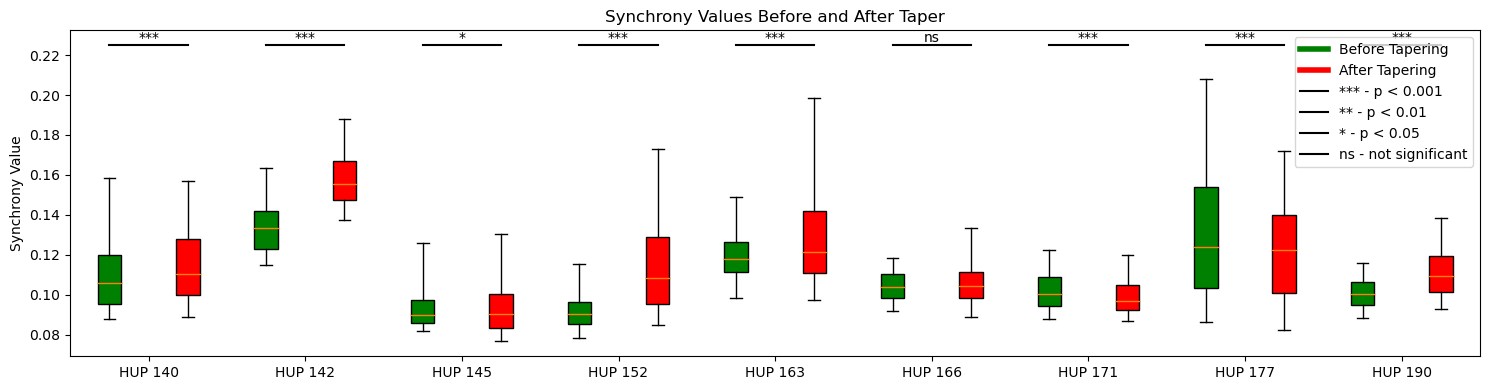

In [5]:
# Assuming taper_df and hourly_patient_features_df are already defined and loaded with data.

# ... (rest of your data processing code)

# Use matplotlib to create the boxplots in a wider figure
fig, ax = plt.subplots(figsize=(15, 4))  # Making the figure wider

# Define the percentile for the whiskers (e.g., 5th and 95th percentiles)
lower_whisker = 5
upper_whisker = 95

# You would have to iterate over your dictionaries to plot the 'before' and 'after' boxplots using the new indices
positions = []
labels = []
for hup_index in sorted(before_synchronies_dict.keys()):
    hup_id = unique_hup_ids[hup_index]  # Retrieve the actual hup_id for labeling
    # Calculate positions for 'before' and 'after' boxplots
    before_position = 2 * hup_index
    after_position = 2 * hup_index + 1
    # Center label position between 'before' and 'after'
    label_position = (before_position + after_position) / 2
    positions.append(label_position)
    labels.append(f"HUP {hup_id}")

    # Plot 'before' boxplot
    bp_before = ax.boxplot(
        before_synchronies_dict[hup_index],
        positions=[before_position],
        patch_artist=True,
        widths=0.3,
        showfliers=False,
        whis=[lower_whisker, upper_whisker],
    )
    plt.setp(bp_before["boxes"], facecolor="green")

    # Plot 'after' boxplot
    bp_after = ax.boxplot(
        after_synchronies_dict[hup_index],
        positions=[after_position],
        patch_artist=True,
        widths=0.3,
        showfliers=False,
        whis=[lower_whisker, upper_whisker],
    )
    plt.setp(bp_after["boxes"], facecolor="red")

    # Statistical test and significance annotation
    u_statistic, p_value = mannwhitneyu(
        before_synchronies_dict[hup_index],
        after_synchronies_dict[hup_index],
        alternative="two-sided",
    )
    sig = "ns"  # Default to not significant
    if p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"

    # Annotation at a fixed y-value
    annotation_y = 0.225
    ax.plot(
        [before_position, after_position],
        [annotation_y, annotation_y],
        lw=1.5,
        c="black",
    )
    ax.text(
        (before_position + after_position) / 2,
        annotation_y,
        sig,
        ha="center",
        va="bottom",
        color="black",
    )

# Adjusting x-axis labels
ax.set_ylabel("Synchrony Value")
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0)  # Labels are now more concise
plt.title("Synchrony Values Before and After Taper")

# Updating the legend
legend_elements = [
    Line2D([0], [0], color="green", lw=4, label="Before Tapering"),
    Line2D([0], [0], color="red", lw=4, label="After Tapering"),
    Line2D([0], [0], color="black", lw=1.5, label="*** - p < 0.001"),
    Line2D([0], [0], color="black", lw=1.5, label="** - p < 0.01"),
    Line2D([0], [0], color="black", lw=1.5, label="* - p < 0.05"),
    Line2D([0], [0], color="black", lw=1.5, label="ns - not significant"),
]
ax.legend(handles=legend_elements, loc="upper right")

# Finalizing the plot
plt.tight_layout()
plt.show()